In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
file_participation = "participation.xlsx"
file_enrollment = 'enrollment.xlsx'

participation2018 = pd.read_excel(file_participation, index_col=1, header=None, names=['School', 'Takers', 'Tests', '1', '2', '3', '4', '5+'])
participation2018.index.names = ['ID']
enrollment2018 = pd.read_excel(file_enrollment, index_col=1, names=['School', 'enrollment', 'state_rank', 'nat_rank'])
enrollment2018.index.names = ['ID']

#participation2018 = pd.concat([participation2018])

In [142]:
relative_to_enrollment = pd.DataFrame()
relative_to_takers = pd.DataFrame()
relative_to_tests = pd.DataFrame()

In [143]:
participation_reference = pd.DataFrame([participation2018['1'],
                                        participation2018['2'],
                                        participation2018['3'],
                                        participation2018['4'],
                                        participation2018['5+']])
participation_reference = participation_reference.T
participation_reference['3+'] = participation2018['3'] + participation2018['4'] + participation2018['5+']
participation_reference['4+'] = participation2018['4'] + participation2018['5+']

In [144]:
participation_reference.head()

,1,2,3,4,5+,3+,4+
ID,,,,,,,
10505,36.0,21.0,20.0,2.0,0.0,22.0,2.0
50505,112.0,78.0,26.0,11.0,4.0,41.0,15.0
70505,43.0,39.0,2.0,0.0,0.0,2.0,0.0
90505,199.0,183.0,77.0,18.0,3.0,98.0,21.0
100505,117.0,129.0,91.0,42.0,18.0,151.0,60.0


In [145]:
for i in participation_reference.columns:
    relative_to_enrollment[i] = participation_reference[i] / enrollment2018['enrollment'] * 100
    relative_to_takers[i] = participation_reference[i] / participation2018['Takers'] * 100
    relative_to_tests[i] = participation_reference[i] / participation2018['Tests'] * 100

In [146]:
relative_to_enrollment.head()

,1,2,3,4,5+,3+,4+
ID,,,,,,,
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10505,6.96325,4.061896,3.868472,0.386847,0.0,4.255319,0.386847


In [147]:
relative_to_takers.head()

,1,2,3,4,5+,3+,4+
ID,,,,,,,
10505,45.569620,26.582278,25.316456,2.531646,0.000000,27.848101,2.531646
50505,48.484848,33.766234,11.255411,4.761905,1.731602,17.748918,6.493506
70505,51.190476,46.428571,2.380952,0.000000,0.000000,2.380952,0.000000
90505,41.458333,38.125000,16.041667,3.750000,0.625000,20.416667,4.375000
100505,29.471033,32.493703,22.921914,10.579345,4.534005,38.035264,15.113350


In [148]:
relative_to_takers.head()

,1,2,3,4,5+,3+,4+
ID,,,,,,,
10505,45.569620,26.582278,25.316456,2.531646,0.000000,27.848101,2.531646
50505,48.484848,33.766234,11.255411,4.761905,1.731602,17.748918,6.493506
70505,51.190476,46.428571,2.380952,0.000000,0.000000,2.380952,0.000000
90505,41.458333,38.125000,16.041667,3.750000,0.625000,20.416667,4.375000
100505,29.471033,32.493703,22.921914,10.579345,4.534005,38.035264,15.113350


In [149]:
relative_to = [relative_to_enrollment, relative_to_takers, relative_to_tests]

In [150]:
for i in relative_to:
    i['School'] = participation2018['School']
    i['state_rank'] = enrollment2018['state_rank']
    i['nat_rank'] = enrollment2018['nat_rank']

In [137]:
charted = relative_to_enrollment
chosen_column = '4-5+'

In [138]:
charted = charted.sort_values([chosen_column], ascending=False)

In [139]:
#charted = charted.head(5)

C:\Users\elanr\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


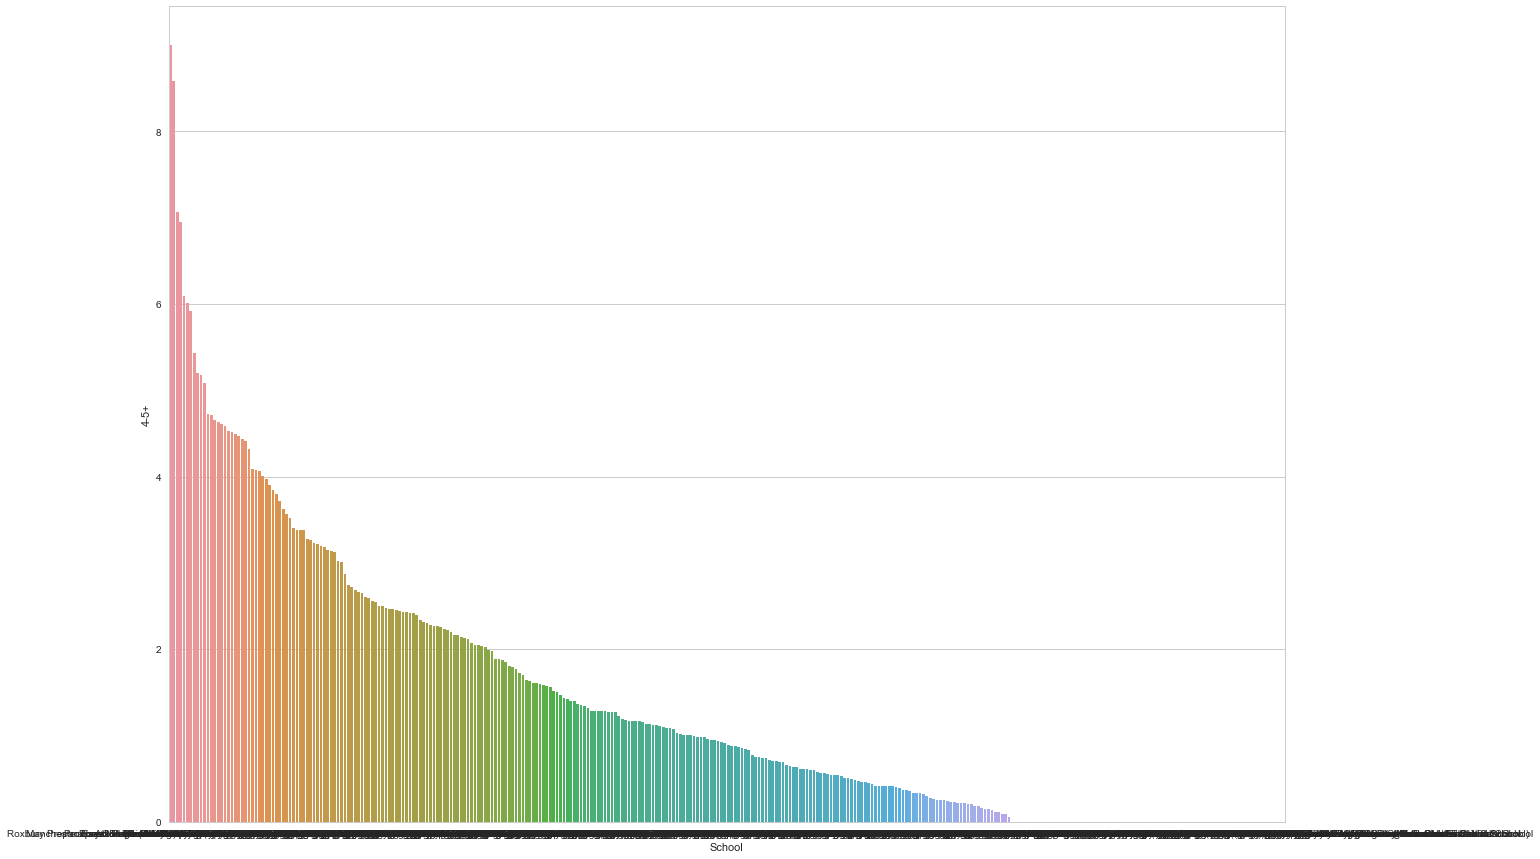

In [140]:
sns.set(style="whitegrid")
plt.subplots(figsize=(20,15))
sns.barplot(x='School', y=chosen_column, data=charted)
plt.show()